In [1]:
import pandas as pd
import numpy as np # Importar numpy para uso futuro (np.inf)
import matplotlib.pyplot as plt # Para histogramas, já podemos importar
import seaborn as sns # Para visualização, já podemos importar

# URL do dataset
url = "https://raw.githubusercontent.com/josenalde/machinelearning/main/src/dataset/housing.csv"

# Carregar o dataset
try:
    df = pd.read_csv(url)
    print("Dataset 'housing.csv' carregado com sucesso!")
    print("\nPrimeiras 5 linhas do dataset:")
    print(df.head())
    print("\nInformações do dataset:")
    df.info()
    print("\nFormato do dataset (linhas, colunas):", df.shape)
    print("\nTipos das features originais (Item a):")
    print(df.dtypes)

except Exception as e:
    print(f"Ocorreu um erro ao carregar o dataset: {e}")

Dataset 'housing.csv' carregado com sucesso!

Primeiras 5 linhas do dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY 

Histogramas das features numéricas:


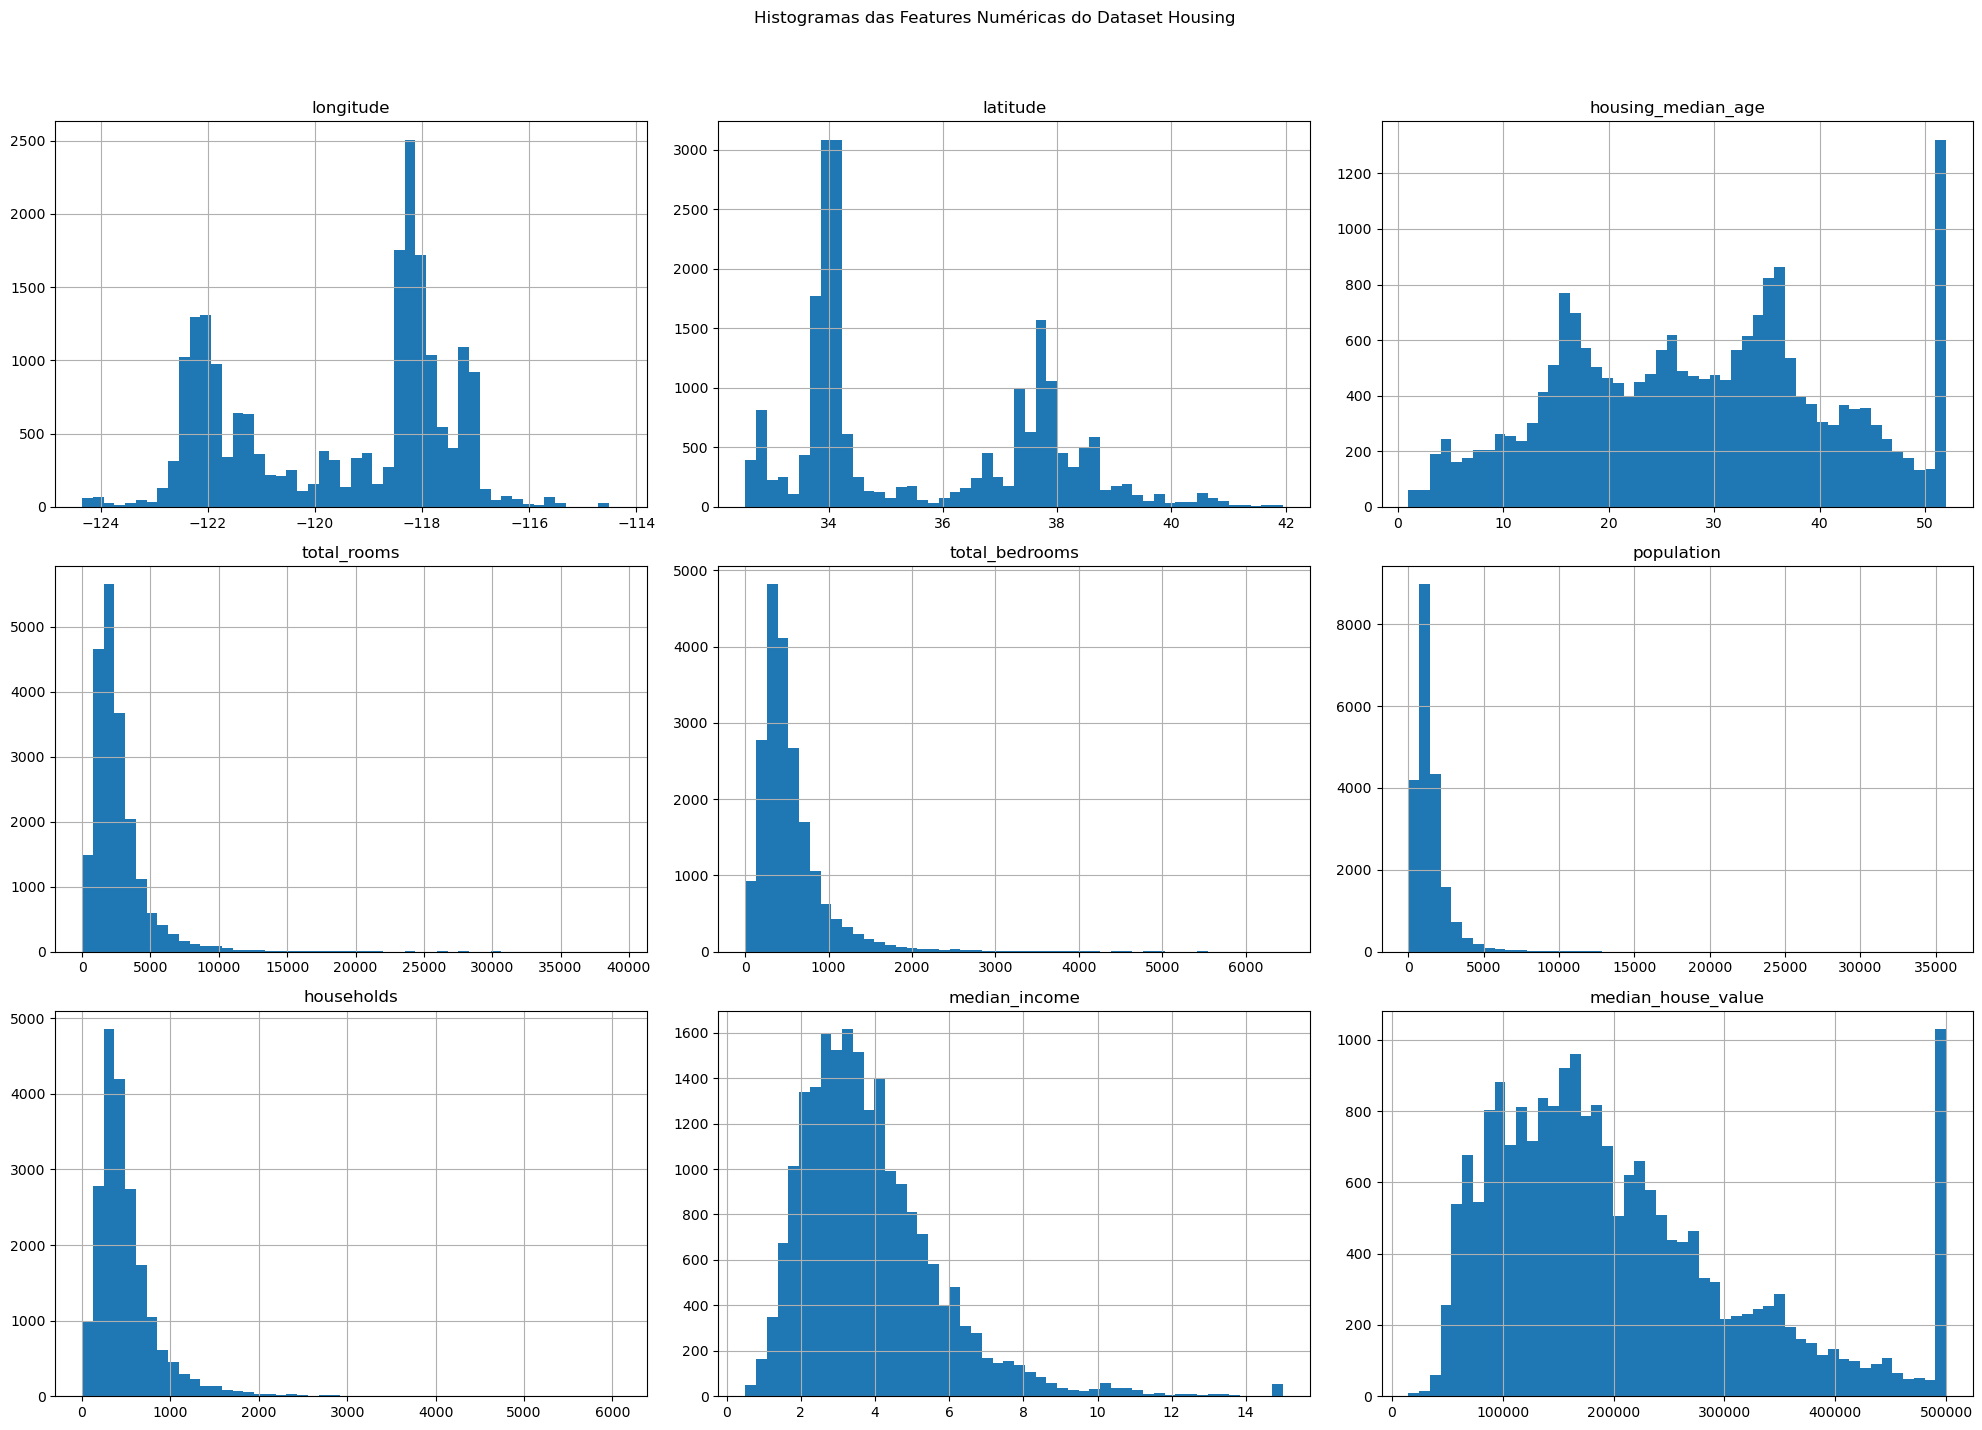


Estatísticas descritivas das features numéricas (df.describe()):
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000 

In [2]:
# 1. Obter o histograma de todas as features numéricas (Item b)
print("Histogramas das features numéricas:")
df.hist(bins=50, figsize=(20,15))
plt.suptitle("Histogramas das Features Numéricas do Dataset Housing")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta layout para não sobrepor o título
plt.show()

# 2. Observar valores limites (describe) e formato das distribuições (Item b)
print("\nEstatísticas descritivas das features numéricas (df.describe()):")
print(df.describe())

In [3]:
# Criar as features 'rooms_per_household' e 'bedrooms_per_room' (Item c)
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households'] # Adicionalmente útil

print("\nPrimeiras 5 linhas do dataset com as novas features:")
print(df.head())

print("\nVerificando as estatísticas descritivas das novas features:")
print(df[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].describe())


Primeiras 5 linhas do dataset com as novas features:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   rooms_per_h

In [4]:
# Obter a matriz de correlação (Item d)
corr_matrix = df.corr(numeric_only=True)

print("Matriz de Correlação:")
print(corr_matrix)

# Listar as 5 features mais fortemente correlacionadas com o valor_medio_imovel (Item d)
# Considerando o valor absoluto da correlação para incluir correlações negativas fortes
print("\n5 Features mais fortemente correlacionadas com 'median_house_value':")
# Excluímos a própria 'median_house_value' da lista das "features correlacionadas com ela mesma"
# Usamos abs() para considerar a força da correlação, seja ela positiva ou negativa
top_5_correlated = corr_matrix['median_house_value'].abs().sort_values(ascending=False)
print(top_5_correlated.drop('median_house_value').head(5))

Matriz de Correlação:
                          longitude  latitude  housing_median_age  \
longitude                  1.000000 -0.924664           -0.108197   
latitude                  -0.924664  1.000000            0.011173   
housing_median_age        -0.108197  0.011173            1.000000   
total_rooms                0.044568 -0.036100           -0.361262   
total_bedrooms             0.069608 -0.066983           -0.320451   
population                 0.099773 -0.108785           -0.296244   
households                 0.055310 -0.071035           -0.302916   
median_income             -0.015176 -0.079809           -0.119034   
median_house_value        -0.045967 -0.144160            0.105623   
rooms_per_household       -0.027540  0.106389           -0.153277   
bedrooms_per_room          0.092657 -0.113815            0.136089   
population_per_household   0.002476  0.002366            0.013191   

                          total_rooms  total_bedrooms  population  households  \

In [6]:
from sklearn.model_selection import train_test_split

# 1. Crie uma nova feature temporária 'income_cat' para estratificação (Item e)
# Os preços dos imóveis não estão em dólares americanos, mas em faixas.
# A feature 'income_cat' será baseada em 'median_income'.
df['income_cat'] = pd.cut(df['median_income'],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

print("\nContagem de valores da nova feature 'income_cat' para estratificação:")
print(df['income_cat'].value_counts().sort_index())

# 2. Faça o train_test_split com 20% para teste, estratificado por 'income_cat' (Item f)
# Primeiro, separe as features (X) e o target (y)
X = df.drop("median_house_value", axis=1) # Todas as colunas exceto o target
y = df["median_house_value"] # O target

# Realize a divisão estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['income_cat'] # estratificar por income_cat
)

print(f"\nFormato do conjunto de treino (X_train): {X_train.shape}")
print(f"Formato do conjunto de teste (X_test): {X_test.shape}")
print(f"Formato do target de treino (y_train): {y_train.shape}")
print(f"Formato do target de teste (y_test): {y_test.shape}")

# Verifique as proporções das categorias de renda em cada conjunto (opcional, para confirmar estratificação)
print("\nProporções de 'income_cat' no dataset completo:")
print(df['income_cat'].value_counts() / len(df))
print("\nProporções de 'income_cat' no conjunto de treino:")
print(X_train['income_cat'].value_counts() / len(X_train))
print("\nProporções de 'income_cat' no conjunto de teste:")
print(X_test['income_cat'].value_counts() / len(X_test))

# 3. Remova a coluna 'income_cat' dos conjuntos de treino e teste (Item g)
X_train = X_train.drop('income_cat', axis=1)
X_test = X_test.drop('income_cat', axis=1)

print("\nColuna 'income_cat' removida dos conjuntos de treino e teste.")
print(f"Novas colunas em X_train: {X_train.columns.tolist()}")
print(f"Novas colunas em X_test: {X_test.columns.tolist()}")


Contagem de valores da nova feature 'income_cat' para estratificação:
income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

Formato do conjunto de treino (X_train): (16512, 13)
Formato do conjunto de teste (X_test): (4128, 13)
Formato do target de treino (y_train): (16512,)
Formato do target de teste (y_test): (4128,)

Proporções de 'income_cat' no dataset completo:
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

Proporções de 'income_cat' no conjunto de treino:
income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

Proporções de 'income_cat' no conjunto de teste:
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Coluna 'income_cat' removida dos conjuntos de treino e teste.
Novas colunas em X_train: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms'

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder # Adicionado OneHotEncoder aqui
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identificar colunas numéricas e categóricas para o ColumnTransformer
# Vamos excluir 'ocean_proximity' das categóricas gerais para tratá-la separadamente com OrdinalEncoder
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Verificar se 'ocean_proximity' está presente antes de tentar removê-la das categóricas_onehot
if 'ocean_proximity' in X_train.select_dtypes(include=['object']).columns:
    categorical_cols_onehot = X_train.select_dtypes(include=['object']).columns.drop('ocean_proximity').tolist()
else:
    categorical_cols_onehot = X_train.select_dtypes(include=['object']).columns.tolist()

ordinal_cols = ['ocean_proximity'] # Coluna a ser tratada com OrdinalEncoder

print(f"Colunas numéricas para imputação e padronização: {numerical_cols}")
print(f"Colunas categóricas para OneHotEncoder (se houver outras além de ocean_proximity): {categorical_cols_onehot}")
print(f"Colunas para OrdinalEncoder: {ordinal_cols}")

# Crie pipelines para as transformações
# Pipeline para features numéricas: Imputação com a média e Padronização
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Item h
    ('scaler', StandardScaler()) # Item i
])

# Pipeline para features categóricas (OneHotEncoder):
categorical_onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline para OrdinalEncoder na coluna 'ocean_proximity' (Item j)
# Assumindo a ordem: 'INLAND' (o mais longe/barato), '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND' (o mais perto/caro)
# A ordem das categorias precisa ser baseada no conhecimento do domínio.
# Verificado as categorias únicas presentes no dataset para garantir a ordem:
# X['ocean_proximity'].value_counts() mostra as categorias e suas contagens.
categories_ordered = ['INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND']

# Verifica se todas as categorias únicas de X_train estão na lista ordenada.
# Se não estiverem, ou se houver categorias inesperadas, pode haver problemas.
# Para este dataset em particular, esta ordem é esperada para cobrir todas as categorias.
if not set(X_train['ocean_proximity'].unique()).issubset(set(categories_ordered)):
    print("\nAtenção: As categorias em X_train['ocean_proximity'] não correspondem exatamente à lista ordenada ou há categorias não mapeadas. O OrdinalEncoder pode se comportar de forma inesperada.")
    print(f"Categorias únicas em X_train: {X_train['ocean_proximity'].unique().tolist()}")
    print(f"Lista ordenada usada: {categories_ordered}")

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[categories_ordered], handle_unknown='use_encoded_value', unknown_value=-1))
])

# Construa Pipeline ColumnTransformer que agregue tais transformações (Item k)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols), # Imputação e Padronização
        ('cat_onehot', categorical_onehot_transformer, categorical_cols_onehot), # OneHotEncoder para outras categóricas (se houver)
        ('ord', ordinal_transformer, ordinal_cols) # OrdinalEncoder para ocean_proximity
    ],
    remainder='passthrough' # Manter colunas não especificadas
)

print("\nPré-processador (ColumnTransformer) configurado com sucesso!")
print("Pronto para a validação com Grid Search e comparação dos modelos de regressão.")

Colunas numéricas para imputação e padronização: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
Colunas categóricas para OneHotEncoder (se houver outras além de ocean_proximity): []
Colunas para OrdinalEncoder: ['ocean_proximity']

Pré-processador (ColumnTransformer) configurado com sucesso!
Pronto para a validação com Grid Search e comparação dos modelos de regressão.


Iniciando Grid Search e validação cruzada para modelos de regressão...

------ Processando: Linear Regression ------
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Melhores parâmetros para Linear Regression: {}
Melhor score (MSE na validação cruzada): 4757013187.48
R2 Score no conjunto de treino (avaliação): 0.6481
MSE no conjunto de treino (avaliação): 4710491613.85
MSE no conjunto de TESTE: 4538027952.14
R2 Score no conjunto de TESTE: 0.6518

------ Processando: Decision Tree Regressor ------
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Melhores parâmetros para Decision Tree Regressor: {'regressor__max_depth': 15, 'regressor__min_samples_leaf': 10}
Melhor score (MSE na validação cruzada): 3519566261.50
R2 Score no conjunto de treino (avaliação): 0.8609
MSE no conjunto de treino (avaliação): 1861735943.11
MSE no conjunto de TESTE: 3348281183.21
R2 Score no conjunto de TESTE: 0.7431

------ Processando: Random Forest Regressor ------
Fitting 5 folds for eac

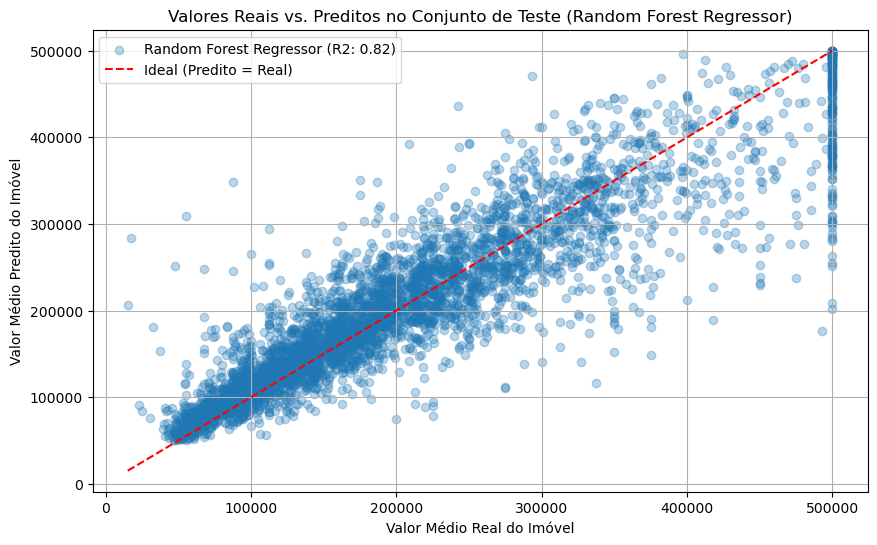

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importações necessárias para os modelos de regressão, Grid Search e métricas
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline # Importa explicitamente Pipeline do sklearn.pipeline

# As variáveis 'preprocessor', 'X_train', 'y_train', 'X_test', 'y_test'
# devem estar definidas a partir das células anteriores.

# Definir os modelos de regressão e seus pipelines com o preprocessor
# (Item l)
pipelines = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', LinearRegression())]),
    'Decision Tree Regressor': Pipeline(steps=[('preprocessor', preprocessor),
                                               ('regressor', DecisionTreeRegressor(random_state=42))]),
    'Random Forest Regressor': Pipeline(steps=[('preprocessor', preprocessor),
                                                ('regressor', RandomForestRegressor(random_state=42))]),
    # Para regularização (Item n), usaremos Lasso (L1), Ridge (L2) e ElasticNet (L1+L2)
    'Lasso (L1)': Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Lasso(random_state=42))]),
    'Ridge (L2)': Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge(random_state=42))]),
    'ElasticNet (L1+L2)': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', ElasticNet(random_state=42))])
}

# Definir os parâmetros para Grid Search (Item l e n)
# Escopo reduzido para Random Forest Regressor para evitar travamento
param_grids = {
    'Linear Regression': {}, # Linear Regression simples não tem hiperparâmetros para regularização direta como penalty
    'Decision Tree Regressor': {
        'regressor__max_depth': [10, 15, 20], # Ajustado para explorar profundidades razoáveis
        'regressor__min_samples_leaf': [1, 5, 10]
    },
    'Random Forest Regressor': { # Escopo reduzido para melhor gerenciamento de tempo/memória
        'regressor__n_estimators': [50, 100],
        'regressor__max_depth': [10, 15], # Limitando profundidade
        'regressor__min_samples_leaf': [5, 10]
    },
    'Lasso (L1)': {
        'regressor__alpha': [0.1, 1.0, 10.0] # Força da regularização L1
    },
    'Ridge (L2)': {
        'regressor__alpha': [0.1, 1.0, 10.0] # Força da regularização L2
    },
    'ElasticNet (L1+L2)': {
        'regressor__alpha': [0.1, 1.0, 10.0], # Força da regularização combinada
        'regressor__l1_ratio': [0.5, 0.7, 0.9] # Proporção de regularização L1 (0=L2, 1=L1)
    }
}

best_regressors = {}
mse_scores = {}
r2_scores = {}
test_mse_scores = {}
test_r2_scores = {}

print("Iniciando Grid Search e validação cruzada para modelos de regressão...")

# Usar KFold para validação cruzada em regressão
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Primeira passagem para executar GridSearchCV e imprimir resultados detalhados ---
for name, pipeline in pipelines.items():
    print(f"\n------ Processando: {name} ------")
    # Para modelos com param_grids vazios (como Linear Regression), GridSearchCV apenas fará o fit do modelo padrão.
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=cv_strategy,
                               scoring='neg_mean_squared_error', n_jobs=1, verbose=1)

    grid_search.fit(X_train, y_train) # Treinar no conjunto de treino

    best_regressors[name] = grid_search.best_estimator_

    # Avaliação no conjunto de treino completo (após Grid Search)
    y_train_pred = best_regressors[name].predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    mse_scores[name] = mse_train
    r2_scores[name] = r2_train

    print(f"\nMelhores parâmetros para {name}: {grid_search.best_params_}")
    # O best_score_ do GridSearchCV é o MSE Negativo. Multiplicamos por -1 para obter o MSE.
    print(f"Melhor score (MSE na validação cruzada): {-grid_search.best_score_:.2f}")
    print(f"R2 Score no conjunto de treino (avaliação): {r2_train:.4f}")
    print(f"MSE no conjunto de treino (avaliação): {mse_train:.2f}")

    # Aplicar o melhor modelo no conjunto de teste (Item m)
    y_test_pred = best_regressors[name].predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    test_mse_scores[name] = test_mse
    test_r2_scores[name] = test_r2

    print(f"MSE no conjunto de TESTE: {test_mse:.2f}")
    print(f"R2 Score no conjunto de TESTE: {test_r2:.4f}")

# --- Tabela de Resumo Final (mais precisa) ---
final_summary = []

print("\n\n======== Resumo dos Melhores Modelos (Regressão) ========")
print("Métrica de Avaliação: Menor MSE (Melhor), Maior R2 (Melhor)")
print("---------------------------------------------------------------------------------------------------------------------")
print(f"{'Modelo':<25} | {'Validação MSE':<15} | {'Teste MSE':<12} | {'Teste R2':<10} | {'Melhores Parâmetros':<50}")
print("---------------------------------------------------------------------------------------------------------------------")

for name, pipeline in pipelines.items():
    # Recria e executa o GridSearchCV para cada modelo para garantir que o best_score_ esteja correto
    # para a linha do resumo, pois o loop anterior pode ter sobrescrito grid_search.
    grid_search_summary = GridSearchCV(pipeline, param_grids[name], cv=cv_strategy,
                               scoring='neg_mean_squared_error', n_jobs=1)
    grid_search_summary.fit(X_train, y_train)

    best_model_val_mse = -grid_search_summary.best_score_
    
    y_test_pred = grid_search_summary.best_estimator_.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    params_str = str(grid_search_summary.best_params_)

    final_summary.append({
        'Model': name,
        'Val_MSE': best_model_val_mse,
        'Test_MSE': test_mse,
        'Test_R2': test_r2,
        'Best_Params_Str': params_str
    })

# Classifica para melhor comparação (ex: por Teste MSE ascendente)
final_summary_sorted = sorted(final_summary, key=lambda x: x['Test_MSE'])

for entry in final_summary_sorted:
    # Ajusta o corte de string para que não quebre no meio de um parâmetro (limita a 50 caracteres)
    truncated_params_str = (entry['Best_Params_Str'][:47] + '...') if len(entry['Best_Params_Str']) > 50 else entry['Best_Params_Str']
    print(f"{entry['Model']:<25} | {entry['Val_MSE']:<15.2f} | {entry['Test_MSE']:<12.2f} | {entry['Test_R2']:<10.4f} | {truncated_params_str:<50}") # Aumenta espaço para parâmetros
print("---------------------------------------------------------------------------------------------------------------------")


# Opcional: Visualização da performance no conjunto de teste (predito vs. real)
# Plota o melhor modelo com base no Teste MSE (o primeiro da lista ordenada).
if final_summary_sorted:
    best_model_name_for_plot = final_summary_sorted[0]['Model']
    # Encontra o modelo real no dicionário best_regressors, que já foi treinado e otimizado na primeira passagem
    best_model_for_plot = next((model for name, model in best_regressors.items() if name == best_model_name_for_plot), None)

    if best_model_for_plot:
        plt.figure(figsize=(10, 6))
        y_test_pred_best = best_model_for_plot.predict(X_test)
        plt.scatter(y_test, y_test_pred_best, alpha=0.3, label=f'{best_model_name_for_plot} (R2: {final_summary_sorted[0]["Test_R2"]:.2f})')

        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal (Predito = Real)')
        plt.xlabel('Valor Médio Real do Imóvel')
        plt.ylabel('Valor Médio Predito do Imóvel')
        plt.title(f'Valores Reais vs. Preditos no Conjunto de Teste ({best_model_name_for_plot})')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"\nNão foi possível plotar: Modelo '{best_model_name_for_plot}' não encontrado em best_regressors.")

In [13]:
import joblib

# O modelo 'Random Forest Regressor' foi identificado como o melhor
# Ele está armazenado no dicionário best_regressors
best_random_forest_model = best_regressors['Random Forest Regressor']

# Salvar o pipeline completo do melhor modelo
# O nome do arquivo será 'housing_regression_model.pkl'
joblib.dump(best_random_forest_model, 'housing_regression_model.pkl')

print("Modelo 'Random Forest Regressor' salvo com sucesso como 'housing_regression_model.pkl'")
print("\nVocê pode encontrar o arquivo 'housing_regression_model.pkl' no mesmo diretório do seu notebook.")

Modelo 'Random Forest Regressor' salvo com sucesso como 'housing_regression_model.pkl'

Você pode encontrar o arquivo 'housing_regression_model.pkl' no mesmo diretório do seu notebook.
